In [1]:
import xarray as xr
import matplotlib.pyplot as plt

## Initialise data

In [2]:
datapath = f'/g/data/ng72/as9583/cylc-run/u-dr216/netcdf'
variable = 'stratiform_rainfall_flux'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')[variable]

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')[variable]

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')[variable]

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')[variable]

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')[variable]

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')[variable]

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')[variable]

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')[variable]

factor = 3600 # hourly average in kg/m2/s to mm/hour
for var in [allvar, control, albedo_bare, albedo, bare, SM_albedo, SM_bare, SM]:
    var *= factor


In [3]:
#clip to land only
variable3 = 'land_sea_mask'
landmask = xr.open_dataset(f'{datapath}/{variable3}/{experiment1}{variable3}.nc')["land_binary_mask"].isel(time=0)
allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)
albedo_bare = albedo_bare.where(landmask == 1)
albedo = albedo.where(landmask == 1)
bare = bare.where(landmask == 1)
SM_albedo = SM_albedo.where(landmask == 1)
SM_bare = SM_bare.where(landmask == 1)
SM = SM.where(landmask == 1)


In [4]:
#change to daily
allvar_daily = allvar.resample(time='1D').sum()
control_daily = control.resample(time="1D").sum()
albedo_bare_daily = albedo_bare.resample(time="1D").sum()
albedo_daily = albedo.resample(time="1D").sum()
bare_daily = bare.resample(time="1D").sum()
SM_albedo_daily = SM_albedo.resample(time="1D").sum()
SM_bare_daily = SM_bare.resample(time="1D").sum()
SM_daily = SM.resample(time="1D").sum()

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _va

## Total time series

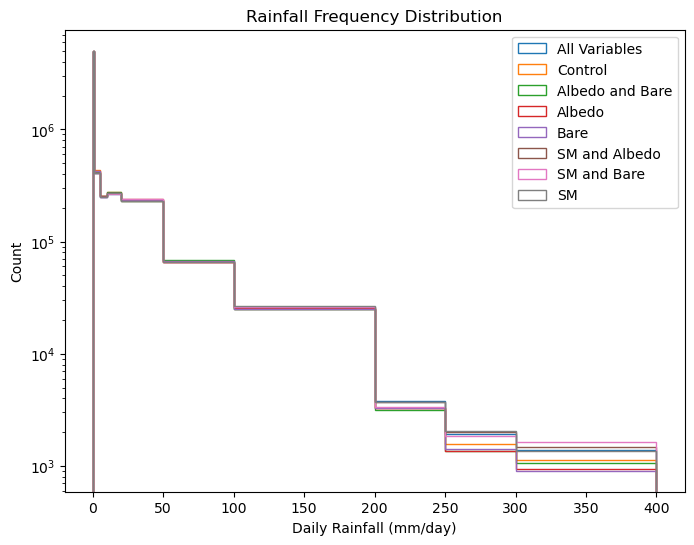

In [5]:
#raw counts, full thing, log axis
bins = [0, 1, 5, 10, 20, 50, 100, 200, 250, 300, 400]
plt.figure(figsize=(8,6))

allvar_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="All Variables",
    density=False,
    log=True  
)

control_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="Control",
    density=False,
    log=True  
)

albedo_bare_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="Albedo and Bare",
    density=False,
    log=True  
)

albedo_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="Albedo",
    density=False,
    log=True  
)

bare_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="Bare",
    density=False,
    log=True  
)

SM_albedo_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="SM and Albedo",
    density=False,
    log=True  
)

SM_bare_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="SM and Bare",
    density=False,
    log=True  
)

SM_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="SM",
    density=False,
    log=True 
)

plt.xlabel("Daily Rainfall (mm/day)")
plt.ylabel("Count")
plt.title("Rainfall Frequency Distribution")
plt.legend()
plt.show()


## Change bin range to inspect closer

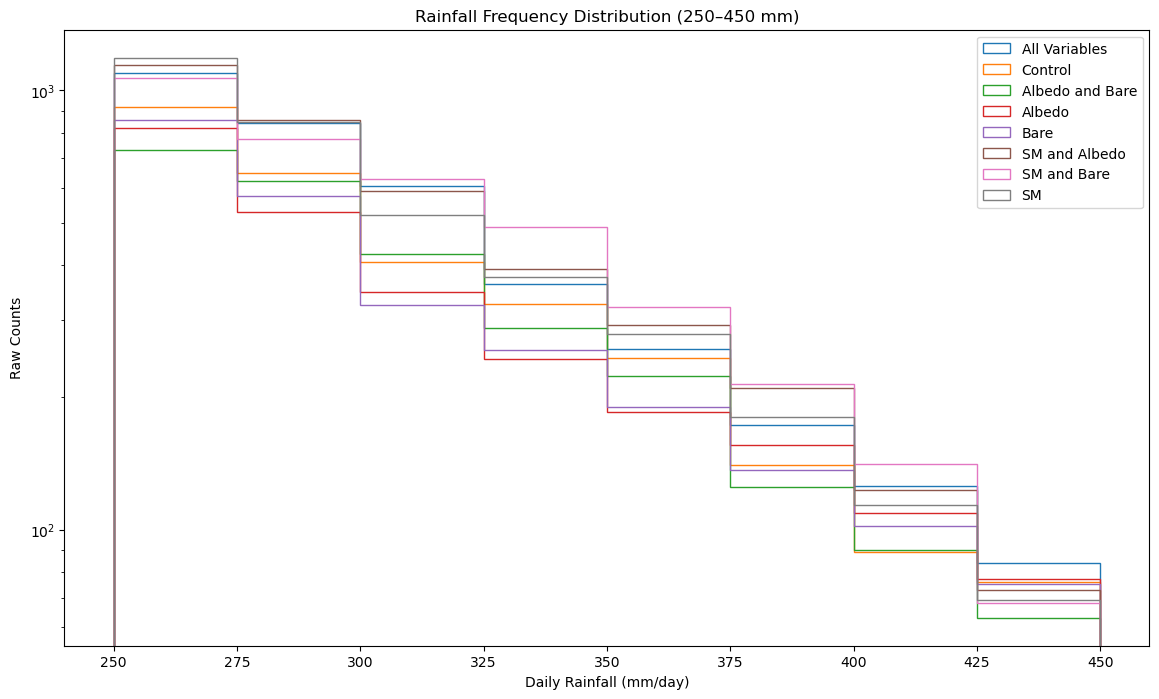

In [6]:
# bins = [0, 1, 5, 10, 20, 50, 100, 200, 250, 300, 400]
# bins = [0, 1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 120, 150]
# bins = [0, 1, 5, 10, 15, 20, 30, 40, 50]
# bins = [60, 70, 80, 100, 120, 150]
bins = [250, 275, 300, 325, 350, 375, 400, 425, 450]
plt.figure(figsize=(14,8))

allvar_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="All Variables",
    density=False,
    log=True  
)

control_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="Control",
    density=False,
    log=True  
)

albedo_bare_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="Albedo and Bare",
    density=False,
    log=True  
)

albedo_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="Albedo",
    density=False,
    log=True  
)

bare_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="Bare",
    density=False,
    log=True  
)

SM_albedo_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="SM and Albedo",
    density=False,
    log=True  
)

SM_bare_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="SM and Bare",
    density=False,
    log=True  
)

SM_daily.plot.hist(
    bins=bins,
    histtype="step",
    linewidth=1,
    label="SM",
    density=False,
    log=True 
)

plt.xlabel("Daily Rainfall (mm/day)")
plt.ylabel("Raw Counts")
plt.title(f"Rainfall Frequency Distribution ({bins[0]}–{bins[-1]} mm)")
plt.legend()
plt.show()

## January convective event

### tried it two different ways, not sure if one is better, they both show the same thing but second is more efficient

### way a

In [7]:
#change to date
allvar_daily_subset      = allvar_daily.sel(time=slice("2020-01-15", "2020-01-18"))
control_daily_subset     = control_daily.sel(time=slice("2020-01-15", "2020-01-18"))
albedo_bare_daily_subset = albedo_bare_daily.sel(time=slice("2020-01-15", "2020-01-18"))
albedo_daily_subset      = albedo_daily.sel(time=slice("2020-01-15", "2020-01-18"))
bare_daily_subset        = bare_daily.sel(time=slice("2020-01-15", "2020-01-18"))
SM_albedo_daily_subset   = SM_albedo_daily.sel(time=slice("2020-01-15", "2020-01-18"))
SM_bare_daily_subset     = SM_bare_daily.sel(time=slice("2020-01-15", "2020-01-18"))
SM_daily_subset          = SM_daily.sel(time=slice("2020-01-15", "2020-01-18"))

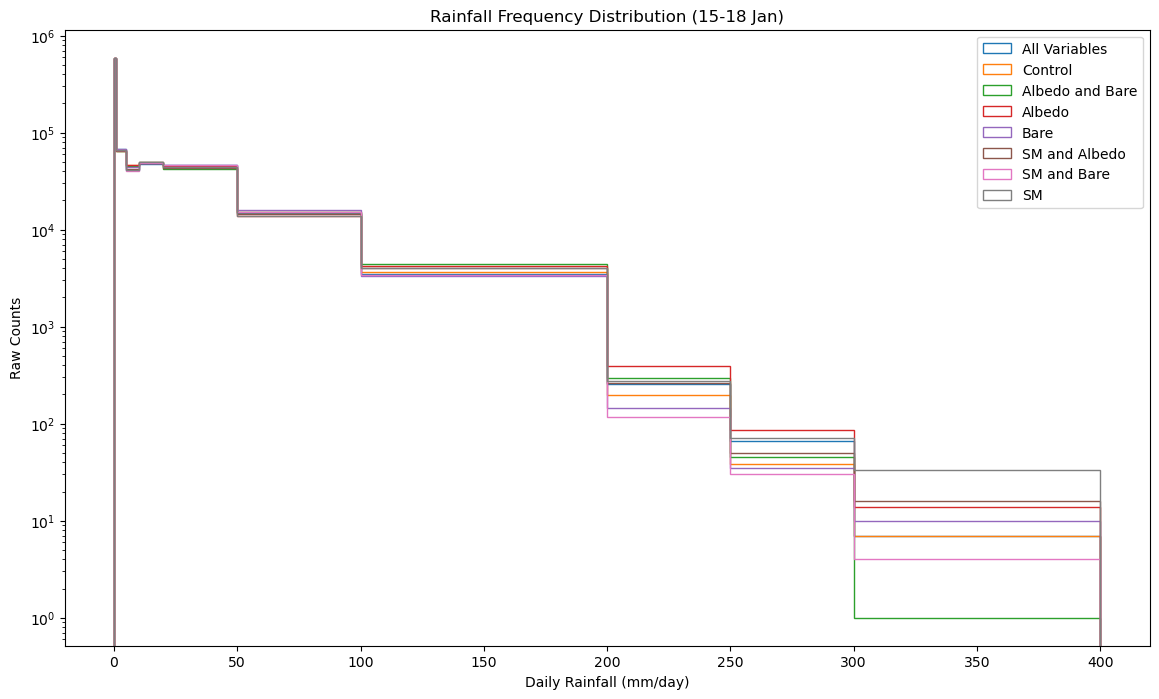

In [8]:
# bins = [250, 275, 300, 325, 350, 375, 400, 425, 450]
# bins = [0, 1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 120, 150]
# bins = [60, 70, 80, 100, 120, 150]
# bins = [0, 1, 5, 10, 15, 20, 30, 40, 50]
bins = [0, 1, 5, 10, 20, 50, 100, 200, 250, 300, 400]
plt.figure(figsize=(14,8))

allvar_daily_subset.plot.hist(bins=bins, histtype="step", linewidth=1, label="All Variables", density=False, log=True)
control_daily_subset.plot.hist(bins=bins, histtype="step", linewidth=1, label="Control", density=False, log=True)
albedo_bare_daily_subset.plot.hist(bins=bins, histtype="step", linewidth=1, label="Albedo and Bare", density=False, log=True)
albedo_daily_subset.plot.hist(bins=bins, histtype="step", linewidth=1, label="Albedo", density=False, log=True)
bare_daily_subset.plot.hist(bins=bins, histtype="step", linewidth=1, label="Bare", density=False, log=True)
SM_albedo_daily_subset.plot.hist(bins=bins, histtype="step", linewidth=1, label="SM and Albedo", density=False, log=True)
SM_bare_daily_subset.plot.hist(bins=bins, histtype="step", linewidth=1, label="SM and Bare", density=False, log=True)
SM_daily_subset.plot.hist(bins=bins, histtype="step", linewidth=1, label="SM", density=False, log=True)

plt.xlabel("Daily Rainfall (mm/day)")
plt.ylabel("Raw Counts")
plt.title("Rainfall Frequency Distribution (15-18 Jan)")
plt.legend()
plt.show()

### way b

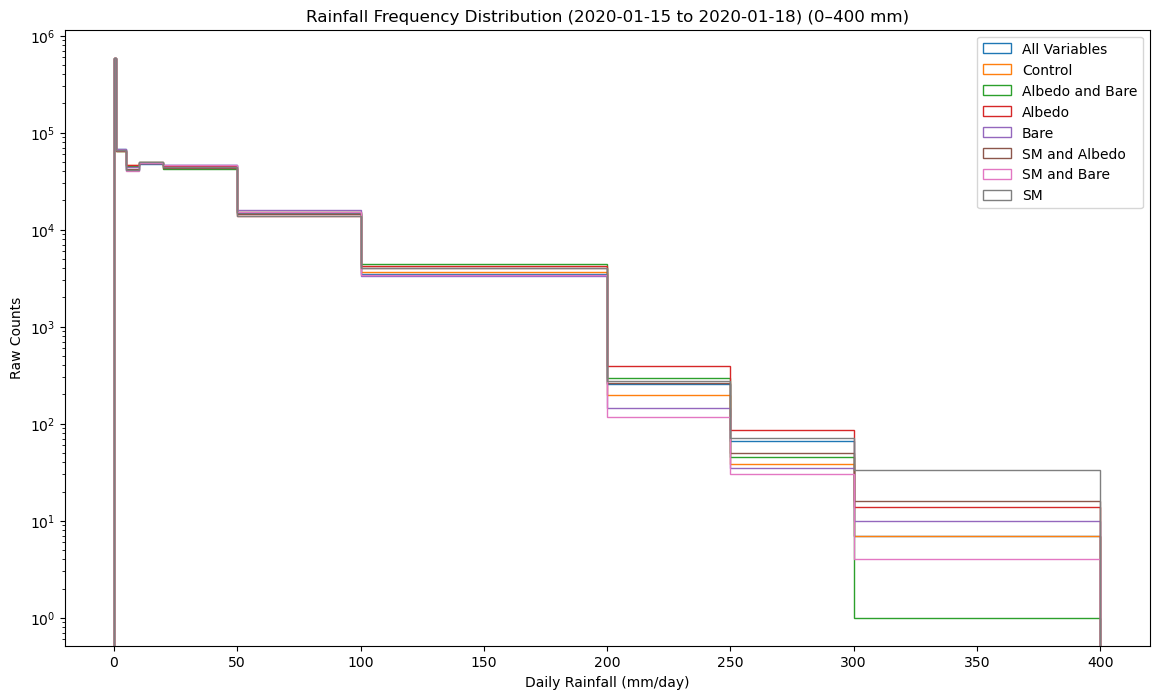

In [9]:
# bins = [250, 275, 300, 325, 350, 375, 400, 425, 450]
# bins = [0, 1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 120, 150]
# bins = [60, 70, 80, 100, 120, 150]
# bins = [0, 1, 5, 10, 15, 20, 30, 40, 50]
bins = [0, 1, 5, 10, 20, 50, 100, 200, 250, 300, 400]
date_range = ("2020-01-15", "2020-01-18")

experiments = {
    "All Variables": allvar_daily,
    "Control": control_daily,
    "Albedo and Bare": albedo_bare_daily,
    "Albedo": albedo_daily,
    "Bare": bare_daily,
    "SM and Albedo": SM_albedo_daily,
    "SM and Bare": SM_bare_daily,
    "SM": SM_daily
}

plt.figure(figsize=(14,8))

for label, da in experiments.items():
    subset = da.sel(time=slice(*date_range))
    subset.plot.hist(
        bins=bins,
        histtype="step",
        linewidth=1,
        label=label,
        density=False,
        log=True
    )

plt.xlabel("Daily Rainfall (mm/day)")
plt.ylabel("Raw Counts")
plt.title(f"Rainfall Frequency Distribution ({date_range[0]} to {date_range[1]}) ({bins[0]}–{bins[-1]} mm)")
plt.legend()
plt.show()

## February ECL event

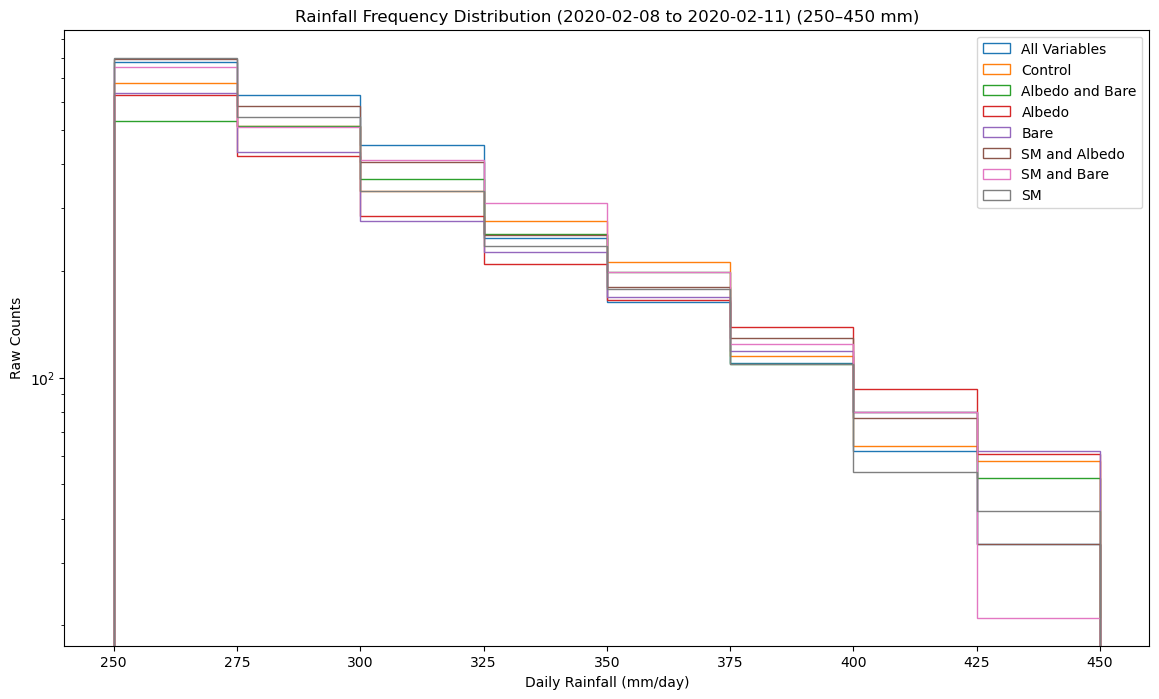

In [10]:
bins = [0, 1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 120, 150]
bins = [250, 275, 300, 325, 350, 375, 400, 425, 450]
# bins = [60, 70, 80, 100, 120, 150]
# bins = [0, 1, 5, 10, 15, 20, 30, 40, 50]
# bins = [0, 1, 5, 10, 20, 50, 100, 200, 250, 300, 400]
date_range = ("2020-02-08", "2020-02-11")

experiments = {
    "All Variables": allvar_daily,
    "Control": control_daily,
    "Albedo and Bare": albedo_bare_daily,
    "Albedo": albedo_daily,
    "Bare": bare_daily,
    "SM and Albedo": SM_albedo_daily,
    "SM and Bare": SM_bare_daily,
    "SM": SM_daily
}

plt.figure(figsize=(14,8))

for label, da in experiments.items():
    subset = da.sel(time=slice(*date_range))
    subset.plot.hist(
        bins=bins,
        histtype="step",
        linewidth=1,
        label=label,
        density=False,
        log=True
    )

plt.xlabel("Daily Rainfall (mm/day)")
plt.ylabel("Raw Counts")
plt.title(f"Rainfall Frequency Distribution ({date_range[0]} to {date_range[1]}) ({bins[0]}–{bins[-1]} mm)")
plt.legend()
plt.show()